<a href="https://colab.research.google.com/github/ywan1416/MAT421/blob/main/Module_H_Section_22_1%2C_22_2%2C_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ODE Initial Value Problem Statement


This means you're trying to find a function  y(t)  such that it satisfies the differential equation and passes through the point $ (t_0, y_0) $. This is called the initial value.


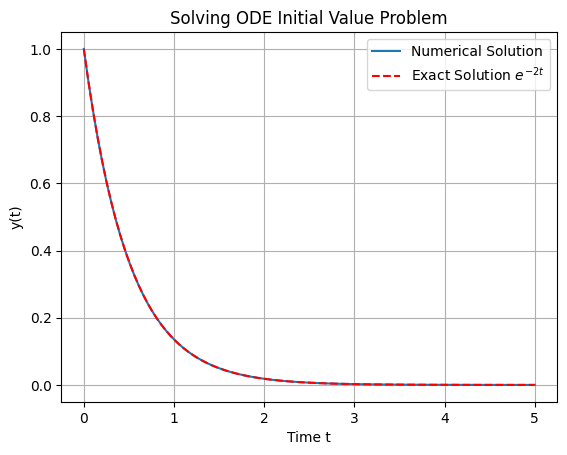

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE: dy/dt = -2y
def ode(t, y):
    return -2 * y

# Set initial condition y(0) = 1
t0 = 0
y0 = [1]

# Time span for the solution
t_span = (0, 5)
t_eval = np.linspace(*t_span, 100)

# Solve the ODE
solution = solve_ivp(ode, t_span, y0, t_eval=t_eval)

# Plot the solution
plt.plot(solution.t, solution.y[0], label='Numerical Solution')
plt.plot(t_eval, np.exp(-2 * t_eval), 'r--', label='Exact Solution $e^{-2t}$')
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('Solving ODE Initial Value Problem')
plt.legend()
plt.grid(True)
plt.show()


# Reduction of Order

Reduction of order is a method used to convert a higher-order ODE (like second-order) into a system of first-order ODEs.

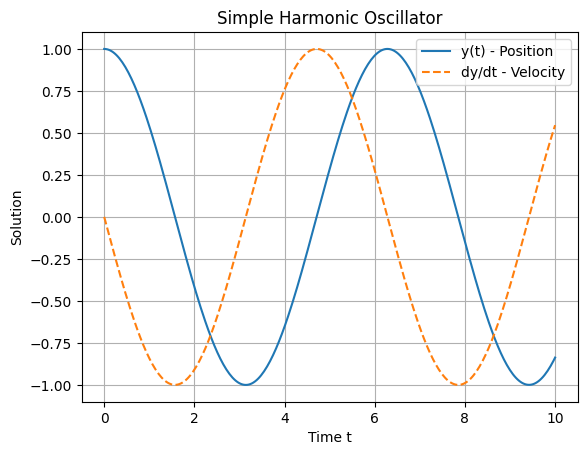

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of first-order ODEs
def harmonic_oscillator(t, Y):
    y1, y2 = Y  # y1 = y, y2 = dy/dt
    dy1dt = y2
    dy2dt = -y1
    return [dy1dt, dy2dt]

# Initial conditions
Y0 = [1, 0]  # y(0) = 1, dy/dt(0) = 0
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Solve the system
sol = solve_ivp(harmonic_oscillator, t_span, Y0, t_eval=t_eval)

# Plot the result
plt.plot(sol.t, sol.y[0], label='y(t) - Position')
plt.plot(sol.t, sol.y[1], label='dy/dt - Velocity', linestyle='--')
plt.title('Simple Harmonic Oscillator')
plt.xlabel('Time t')
plt.ylabel('Solution')
plt.legend()
plt.grid(True)
plt.show()


# The Euler Method

a linear approximation using the current slope to estimate the next point

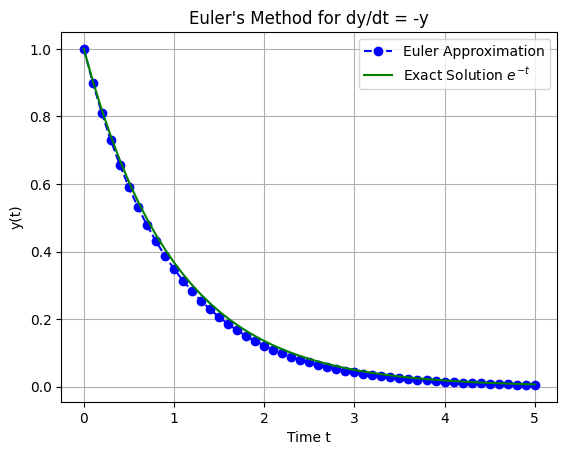

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function dy/dt = -y
def f(t, y):
    return -y

# Parameters
t0, tf = 0, 5      # start and end time
y0 = 1             # initial condition
h = 0.1            # step size
t = np.arange(t0, tf + h, h)  # time grid

# Initialize solution array
y = np.zeros(len(t))
y[0] = y0

# Euler method loop
for i in range(len(t) - 1):
    y[i + 1] = y[i] + h * f(t[i], y[i])

# Exact solution
y_exact = np.exp(-t)

# Plot
plt.plot(t, y, 'bo--', label='Euler Approximation')
plt.plot(t, y_exact, 'g', label='Exact Solution $e^{-t}$')
plt.title("Euler's Method for dy/dt = -y")
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()
